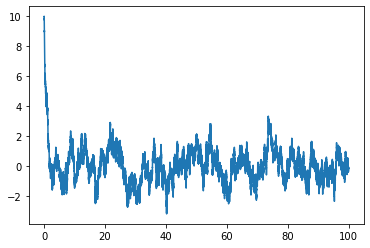

In [18]:
# Exercise 5, part 1: integrating stochastic equation with Euler method

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)


def Euler(x,dt):
    R = np.random.normal(0,1,1)
    dx = -x*dt + (2*dt)**0.5*R
    return x + dx


nsteps = int(1e5)
dt = 0.001
time = np.arange(0,nsteps*dt,dt)
x = [10]

for i in range(nsteps-1):
    x.append(Euler(x[-1],dt))
        
x = np.array(x,dtype='float')
plt.plot(time,x)

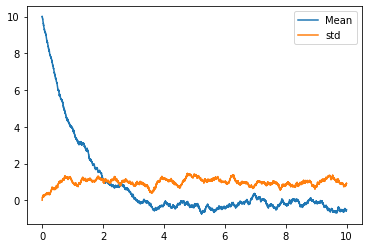

In [16]:
# Exercise 5, part 2: average of x as function of tf

dt = 0.001
x0 = 10.
x = [x0]
nsteps = int(1e4)
tries = 10
time = np.arange(0,nsteps*dt,dt)

for j in range(tries):
    np.random.seed(j)
    for i in range(nsteps-1):
        x.append(Euler(x[-1],dt))
    x.append(x0)
del x[-1]

x = np.array(x,dtype='float').reshape(10,nsteps)
mean = np.sum(x, axis=0)/tries
std = (np.sum(x**2,axis=0)/tries - mean**2)**0.5

plt.plot(time,mean, label='Mean')
plt.plot(time,std, label='std')
plt.legend()

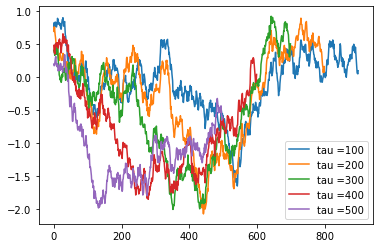

In [61]:
# Exercise 5, part 3: time increment 

dt = 0.001
nsteps = int(1e3)
time = np.arange(0,nsteps*dt,dt)
x = [1]

for i in range(nsteps-1):
    x.append(Euler(x[-1],dt))
    
x = np.array(x,dtype='float')

for j in range(5):
    q = []
    tau = (j+1)*100
    i = 0
    while (i+tau) < nsteps:
        q.append(x[i+tau] - x[i])
        i += 1
    plt.plot(q,label='tau =' +str(tau))
plt.legend()   